Thực hành 4: Phân Vùng ảnh

2. viết chương trình phân vùng ảnh

2.1 phân vùng theo histogram

2.1.1 phương pháp otsu

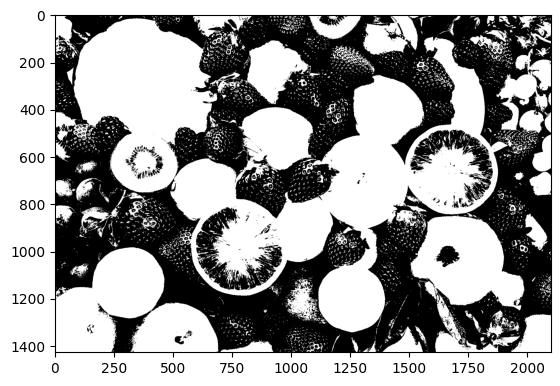

In [12]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a > thres
b = Image.fromarray(b)
plt.imshow(b)
plt.show()

2.1.2 phương pháp adaptive thresholding

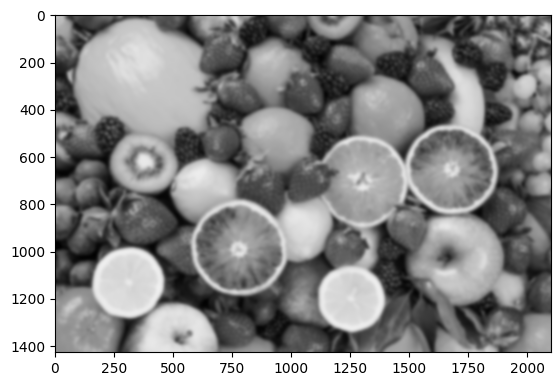

In [13]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow(b)
plt.show()

2.2 phân vùng theo region

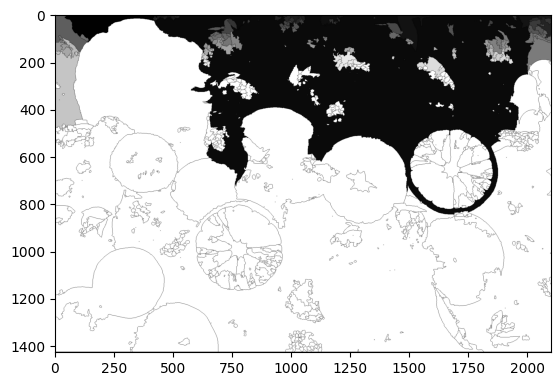

In [15]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('fruit.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations = 2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)
plt.imshow(b)
plt.show()


2.3 biến đổi đối tượng trong ảnh

2.3.1 sử dụng binary_dilation

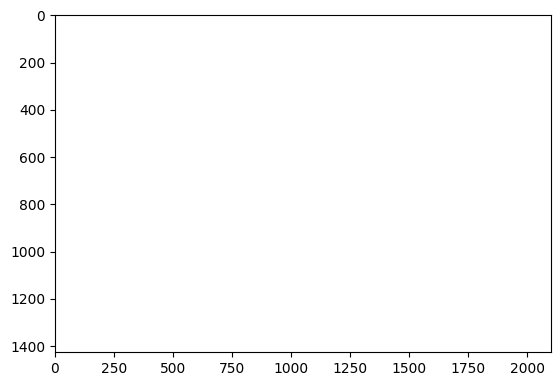

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 sử dụng binary_opening

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iteractions=25)

c = Image.fromarra(b)
c.show()
plt.imshow(c)
plt.show()

2.3.3 sử dụng binary_erosion

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iteractions=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.4 sử dụng binary_closing

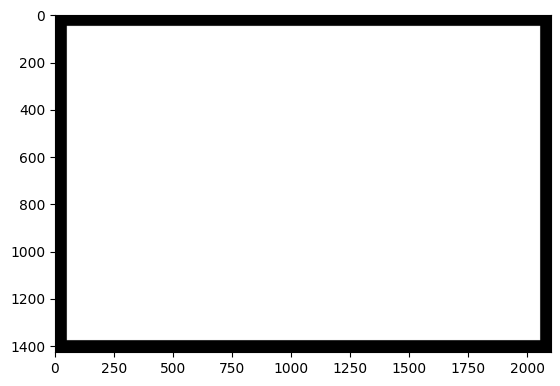

In [4]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

Bài tập


1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px . Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3, lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình

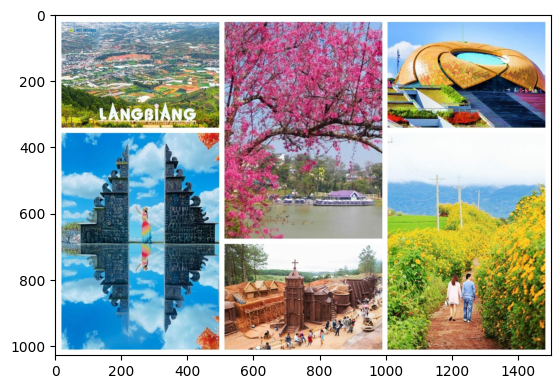

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('dalat.jpg')
plt.imshow(data)
plt.show()

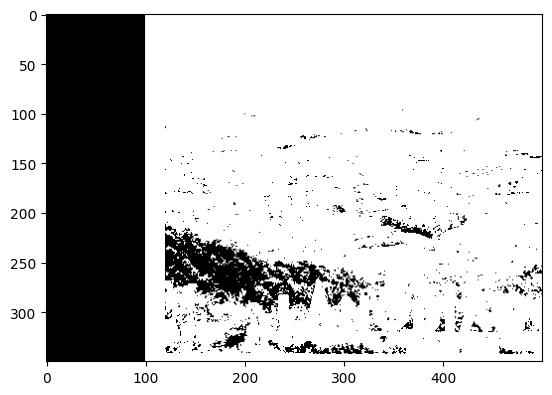

In [12]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
data = iio.imread('dalat.jpg', mode='F') 


bmg = data[0:350, 0:500]
lang_biang_shifted = nd.shift(bmg, shift=(0, 100))

if lang_biang_shifted.max() > 1.0:
    lang_biang_norm = lang_biang_shifted / 255.0
else:
    lang_biang_norm = lang_biang_shifted
segmented = lang_biang_norm > 0.3
segmented_image = Image.fromarray((segmented * 255).astype(np.uint8))
segmented_image.save('lang_biang.jpg')
plt.imshow(segmented_image, cmap='gray')
plt.show()



2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45 độ và dùng phương pháp adaptive threshoding với ngưỡng 60 và lưu vào máy với tên là ho_xuan-huong.jpg

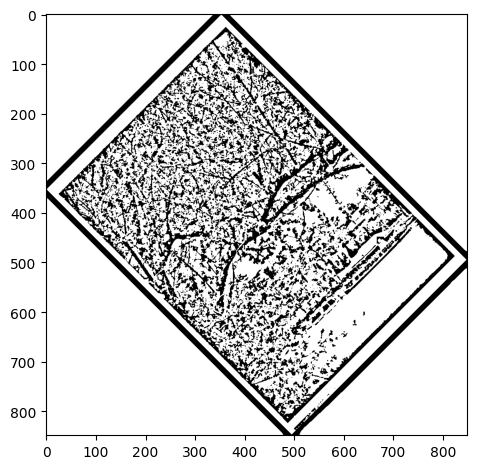

In [17]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = iio.imread('dalat.jpg', mode='F') 
ho_xuan_huong = data[0:700, 500:1000]
ho_xuan_huong_rotate = nd.rotate(ho_xuan_huong, 45, reshape=True)

# 4. Dùng ảnh gốc không chuẩn hóa (giá trị pixel có thể từ 0 đến 255)
a = np.asarray(ho_xuan_huong_rotate)

# 5. Áp dụng adaptive thresholding với block_size=39, offset=10
b = threshold_local(a, block_size=39, offset=10)

# 6. Nhị phân hóa ảnh
binary = a > b

# 7. Chuyển ảnh nhị phân sang định dạng ảnh và lưu
binary_image = Image.fromarray((binary * 255).astype(np.uint8))
binary_image.save('ho_xuan_huong.jpg')
plt.imshow(binary_image, cmap='gray')
plt.tight_layout()
plt.show()

3.Viết chương trình chọn quảng trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.

4. tạo menu như trong hình mẫu
viết chương trình cho phép người dùng nhập chức năng muốn xử lý.(Có thể chọn 1 chức năng duy nhất kết hợp 2 chức năng của geometric_transformation và segment)